In [1]:
# project: Final
# submitter: amurali7
# partner: none
# hours: 15

In [2]:
import pandas as pd
import requests
import os
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Dataset containing earthquake information.
url = "https://opendata.arcgis.com/datasets/9e2f2b544c954fda9cd13b7f3e6eebce_0.csv"

if not os.path.exists("Recent_Earthquakes.csv"):
    print("DOWNLOAD")
    df = pd.read_csv(url)
    df.to_csv("Recent_Earthquakes", index=False)

df = pd.read_csv("Recent_Earthquakes.csv")


In [4]:
fig1 = df[["mag","tsunami", "eventTime"]].copy()
tsunami = fig1[fig1["tsunami"] == 1.0].copy()
notsunami = fig1[fig1["tsunami"] != 1.0].copy()
tsunami["date"] = pd.to_datetime(tsunami['eventTime'])
notsunami["date"] = pd.to_datetime(notsunami['eventTime'])
tsunami = tsunami[["mag","date"]]
notsunami = notsunami[["mag","date"]]
tsunami = tsunami[tsunami["date"] < "2021-03-31"]
notsunami = notsunami[notsunami["date"] < "2021-03-31"]
print("Average Magnitude for Earthquakes that caused Tsunamis: " + str(tsunami["mag"].mean()))
print("Average Magnitude for Earthquakes that did not cause Tsunamis: " + str(notsunami["mag"].mean()))

Average Magnitude for Earthquakes that caused Tsunamis: 6.9714285714285715
Average Magnitude for Earthquakes that did not cause Tsunamis: 5.525555555555556


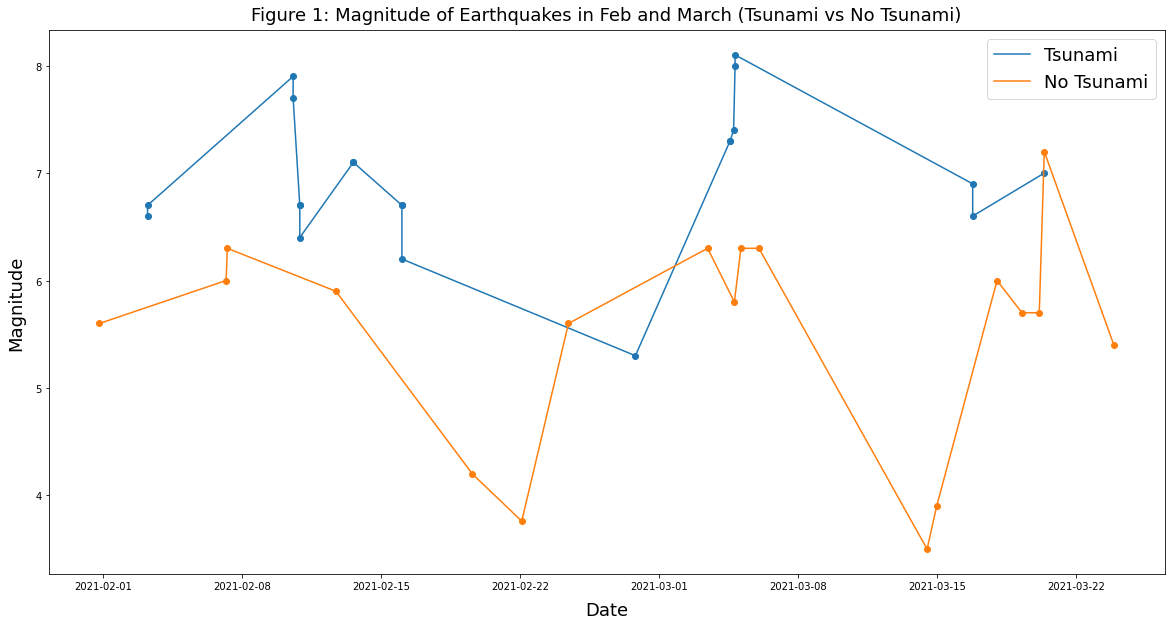

In [5]:
plt.scatter(tsunami["date"], tsunami["mag"], label = "Tsunami")
plt.plot(tsunami["date"], tsunami["mag"], label = "Tsunami")
plt.scatter(notsunami["date"], notsunami["mag"], label = "No Tsunami")
plt.plot(notsunami["date"], notsunami["mag"], label = "Tsunami")
plt.xlabel('Date', fontsize=18, labelpad=10)
plt.ylabel('Magnitude', fontsize=18, labelpad=10)
plt.legend(["Tsunami", "No Tsunami"], fontsize=18)
plt.title("Figure 1: Magnitude of Earthquakes in Feb and March (Tsunami vs No Tsunami)", fontsize=18, pad=10)
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

In [6]:
RelevantData = df[["mag","tsunami", "hoursOld", "longitude", "latitude", "depth","sig"]].copy()
RelevantData["tsunami"] = RelevantData["tsunami"].fillna(0)
RelevantData = RelevantData.dropna()

RelevantData

,mag,tsunami,hoursOld,longitude,latitude,depth,sig
0,5.60,0.0,2121,-59.6065,2.66690,7.22,671
1,6.60,1.0,2063,-98.1100,-36.44600,10.00,670
2,6.70,1.0,2063,-97.6645,-36.18990,10.00,692
3,6.00,0.0,1968,125.2056,6.78330,15.55,600
4,6.30,0.0,1967,146.0591,-3.29290,10.00,611
...,...,...,...,...,...,...,...
2556,0.85,0.0,0,-116.4062,34.16450,6.87,11
2557,1.35,0.0,0,-122.7377,38.74317,2.01,28
2558,0.15,0.0,20,-122.8243,38.81816,2.56,0
2559,2.50,0.0,21,-136.8505,58.47000,1.46,96


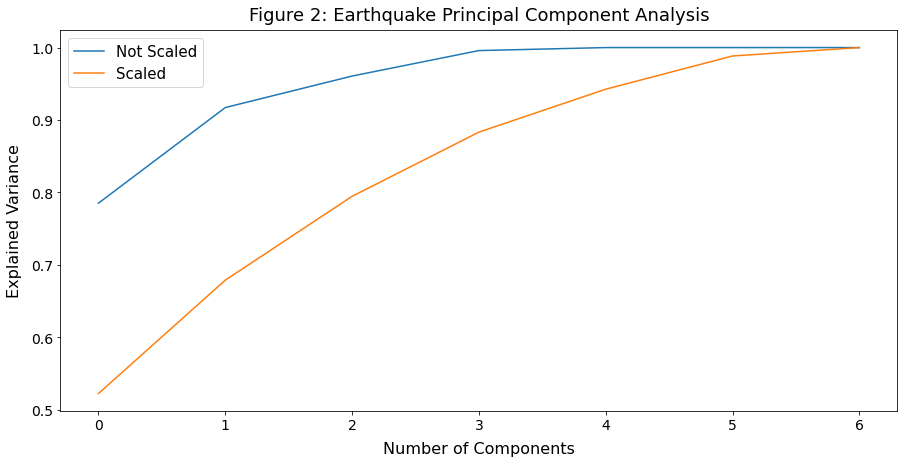

In [7]:
unscaled = PCA(n_components=7)
unscaled.fit(RelevantData)                           
unscaledTransformed = unscaled.transform(RelevantData)

scaler = StandardScaler()
scaler.fit(RelevantData)                              
scaled = scaler.transform(RelevantData)
pca = PCA(n_components=7)
pca.fit(scaled)                         
scaledTransformed = pca.transform(scaled)
                   

plt.plot(np.arange(len(unscaled.explained_variance_ratio_)), np.cumsum(unscaled.explained_variance_ratio_))
plt.plot(np.arange(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components", fontsize=16, labelpad=9)
plt.ylabel("Explained Variance", fontsize=16, labelpad=9)
plt.legend(["Not Scaled", "Scaled"], fontsize=15)
plt.title("Figure 2: Earthquake Principal Component Analysis", fontsize=18, pad=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig = plt.gcf()                         
fig.set_size_inches(15, 7)
plt.show()

In [8]:
lr = LogisticRegression()
p = Pipeline([
        ("std", StandardScaler()),
        ("lr", LogisticRegression()),
    ])
train, test = train_test_split(RelevantData, random_state=0)     
p.fit(train[["mag", "hoursOld", "longitude", "latitude", "depth","sig"]], train["tsunami"])                


train.shape, test.shape
print("Score", p.score(test[["mag", "hoursOld", "longitude", "latitude", "depth","sig"]], test["tsunami"]))
print("Recall", recall_score(test["tsunami"], p.predict(test[["mag", "hoursOld", "longitude", "latitude", "depth","sig"]])))
print("Precision", precision_score(test["tsunami"], p.predict(test[["mag", "hoursOld", "longitude", "latitude", "depth","sig"]])))

Score 0.9870967741935484
Recall 0.5454545454545454
Precision 0.6666666666666666


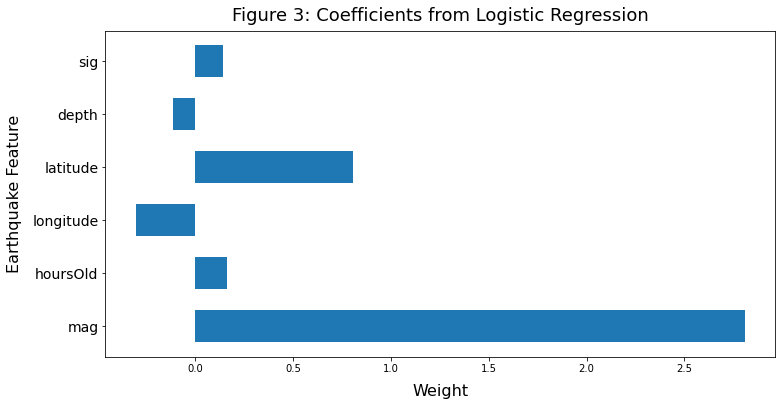

In [9]:
coefs = p["lr"].coef_[0].tolist()

coefArray = np.arange(len(coefs))

plt.barh(coefArray, coefs, 0.6)  
plt.xlabel("Weight", fontsize=16, labelpad=10)
plt.ylabel("Earthquake Feature", fontsize=16, labelpad=10)
plt.yticks(coefArray, ["mag", "hoursOld", "longitude", "latitude", "depth","sig"], fontsize=14)
plt.title("Figure 3: Coefficients from Logistic Regression", fontsize=18, pad=10)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

In [10]:
coefs

[2.8073335647874704,
 0.1620859987652218,
 -0.30447514825468,
 0.8056278209991355,
 -0.11472021389477687,
 0.13835968400309412]